# **Credit-Card-Fraud-Detection**

This is a machine learning project that aims to identify fraudulent transactions using historical data. This data typically includes details about past purchases, such as amount, location, and time. By analyzing this data, the model can learn the spending patterns of individual cardholders. When a new transaction deviates significantly from these patterns (e.g., large purchase overseas), the model can flag it as potentially fraudulent.

### 1. Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

###**2. Loading Data**

In [ ]:
test = pd.read_csv('fraudTest.csv')
train = pd.read_csv('fraudTrain.csv')

In [ ]:
train.shape

(15593, 23)

In [ ]:
train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0.0


In [ ]:
test.shape

(19466, 23)

In [ ]:
test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


###**3. Data Cleaning**

####For train dataset

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15593 entries, 0 to 15592
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15593 non-null  int64  
 1   trans_date_trans_time  15593 non-null  object 
 2   cc_num                 15593 non-null  int64  
 3   merchant               15593 non-null  object 
 4   category               15593 non-null  object 
 5   amt                    15593 non-null  float64
 6   first                  15593 non-null  object 
 7   last                   15593 non-null  object 
 8   gender                 15593 non-null  object 
 9   street                 15593 non-null  object 
 10  city                   15593 non-null  object 
 11  state                  15593 non-null  object 
 12  zip                    15593 non-null  int64  
 13  lat                    15593 non-null  float64
 14  long                   15593 non-null  float64
 15  ci

In [ ]:
train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,15593.000000,1.559300e+04,15593.000000,15593.000000,15593.000000,15593.000000,1.559300e+04,1.559300e+04,15593.000000,15592.000000,15592.000000
mean,7796.000000,4.227322e+17,70.287882,49063.363496,38.537959,-90.429812,9.211852e+04,1.325778e+09,38.540346,-90.423190,0.006414
std,4501.455709,1.316358e+18,126.759764,27027.725226,5.164709,14.225426,3.075263e+05,2.268460e+05,5.190365,14.246013,0.079830
min,0.000000,6.041621e+10,1.010000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.165823,-166.629875,0.000000
25%,3898.000000,1.800462e+14,9.610000,26041.000000,34.690200,-96.962300,7.430000e+02,1.325582e+09,34.787849,-97.074937,0.000000
50%,7796.000000,3.520550e+15,47.960000,48206.000000,39.342600,-87.591700,2.471000e+03,1.325814e+09,39.347491,-87.516981,0.000000
75%,11694.000000,4.642255e+15,83.300000,72059.000000,41.811400,-80.158000,2.112500e+04,1.325968e+09,41.886835,-80.219347,0.000000
max,15592.000000,4.992346e+18,5444.240000,99783.000000,65.689900,-67.950300,2.906700e+06,1.326155e+09,66.645176,-66.967742,1.000000


In [ ]:
train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               1
is_fraud                 1
dtype: int64

In [ ]:
train.duplicated().sum()

0

In [ ]:
train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
#Droping Certain unuseful columns
columns_drop = ["unix_time","merchant","first","street"]
train.drop(columns = columns_drop,inplace= True)
test.drop(columns = columns_drop,inplace= True)

In [ ]:
train.shape


(15593, 19)

####For test dataset

In [ ]:
test.shape

(19466, 19)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19466 entries, 0 to 19465
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             19466 non-null  int64  
 1   trans_date_trans_time  19466 non-null  object 
 2   cc_num                 19466 non-null  int64  
 3   category               19466 non-null  object 
 4   amt                    19466 non-null  float64
 5   last                   19466 non-null  object 
 6   gender                 19466 non-null  object 
 7   city                   19465 non-null  object 
 8   state                  19465 non-null  object 
 9   zip                    19465 non-null  float64
 10  lat                    19465 non-null  float64
 11  long                   19465 non-null  float64
 12  city_pop               19465 non-null  float64
 13  job                    19465 non-null  object 
 14  dob                    19465 non-null  object 
 15  tr

In [ ]:
test.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud
count,19466.000000,1.946600e+04,19466.000000,19465.000000,19465.000000,19465.000000,1.946500e+04,19465.000000,19465.000000,19465.000000
mean,9732.500000,4.180289e+17,68.799466,48491.198921,38.528486,-90.049245,9.049912e+04,38.521391,-90.049769,0.003493
std,5619.494506,1.310838e+18,139.379023,26813.873613,5.092329,13.625865,3.093242e+05,5.130690,13.635438,0.059004
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,19.163455,-166.464422,0.000000
25%,4866.250000,1.800482e+14,9.482500,25526.000000,34.620500,-96.701000,7.600000e+02,34.714781,-96.739825,0.000000
50%,9732.500000,3.520550e+15,46.135000,48043.000000,39.371600,-87.366700,2.470000e+03,39.388556,-87.322759,0.000000
75%,14598.750000,4.634956e+15,81.777500,72011.000000,42.015800,-80.128400,2.047800e+04,41.997075,-80.161030,0.000000
max,19465.000000,4.992346e+18,6600.440000,99783.000000,65.689900,-67.950300,2.906700e+06,66.669356,-66.955602,1.000000


In [ ]:
test.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
category                 0
amt                      0
last                     0
gender                   0
city                     1
state                    1
zip                      1
lat                      1
long                     1
city_pop                 1
job                      1
dob                      1
trans_num                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

In [ ]:
test.duplicated().sum()

0

###**4. EDA**

In [ ]:
# There are a lot of categorical features! So we need to encode them

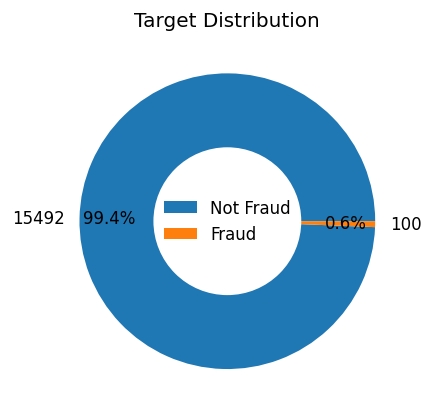

In [ ]:
#Target Distribution

donut = train["is_fraud"].value_counts().reset_index()

labels = ["Not Fraud", "Fraud"]
explode = (0, 0)

fig, ax = plt.subplots(dpi=120, figsize=(8, 4))
plt.pie(donut["count"],
        labels=donut["count"],
        autopct="%1.1f%%",
        pctdistance=0.8,
        explode=explode)

centre_circle = plt.Circle((0.0, 0.0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Target Distribution")
plt.legend(labels, loc="center", frameon=False)
plt.show();

**Highly imbalanced classes because of this, Oversampling/Undersampling can be used in the model.**

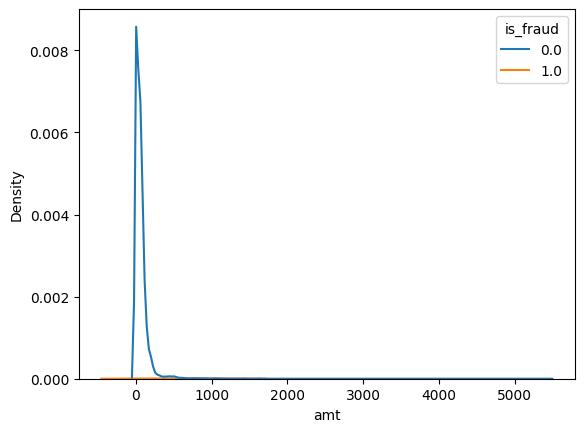

In [ ]:
sns.kdeplot(x="amt", hue="is_fraud",data=train);

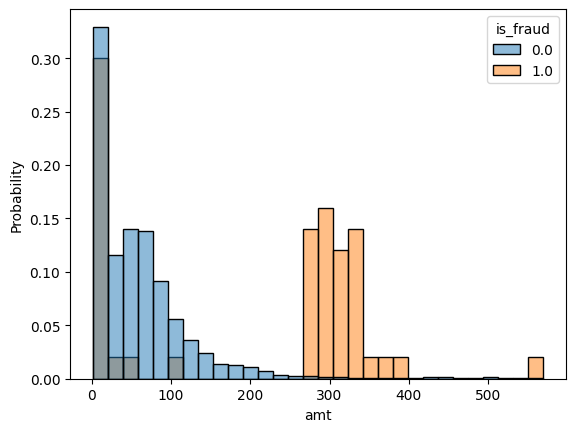

In [ ]:
pct99 = train["amt"].quantile(0.99)
sns.histplot(x="amt", hue="is_fraud", bins=30,
             stat="probability", data=train[train["amt"] <= pct99],
             common_norm=False);


**The probability distribution behaves differently for each value of "is_fraud".**

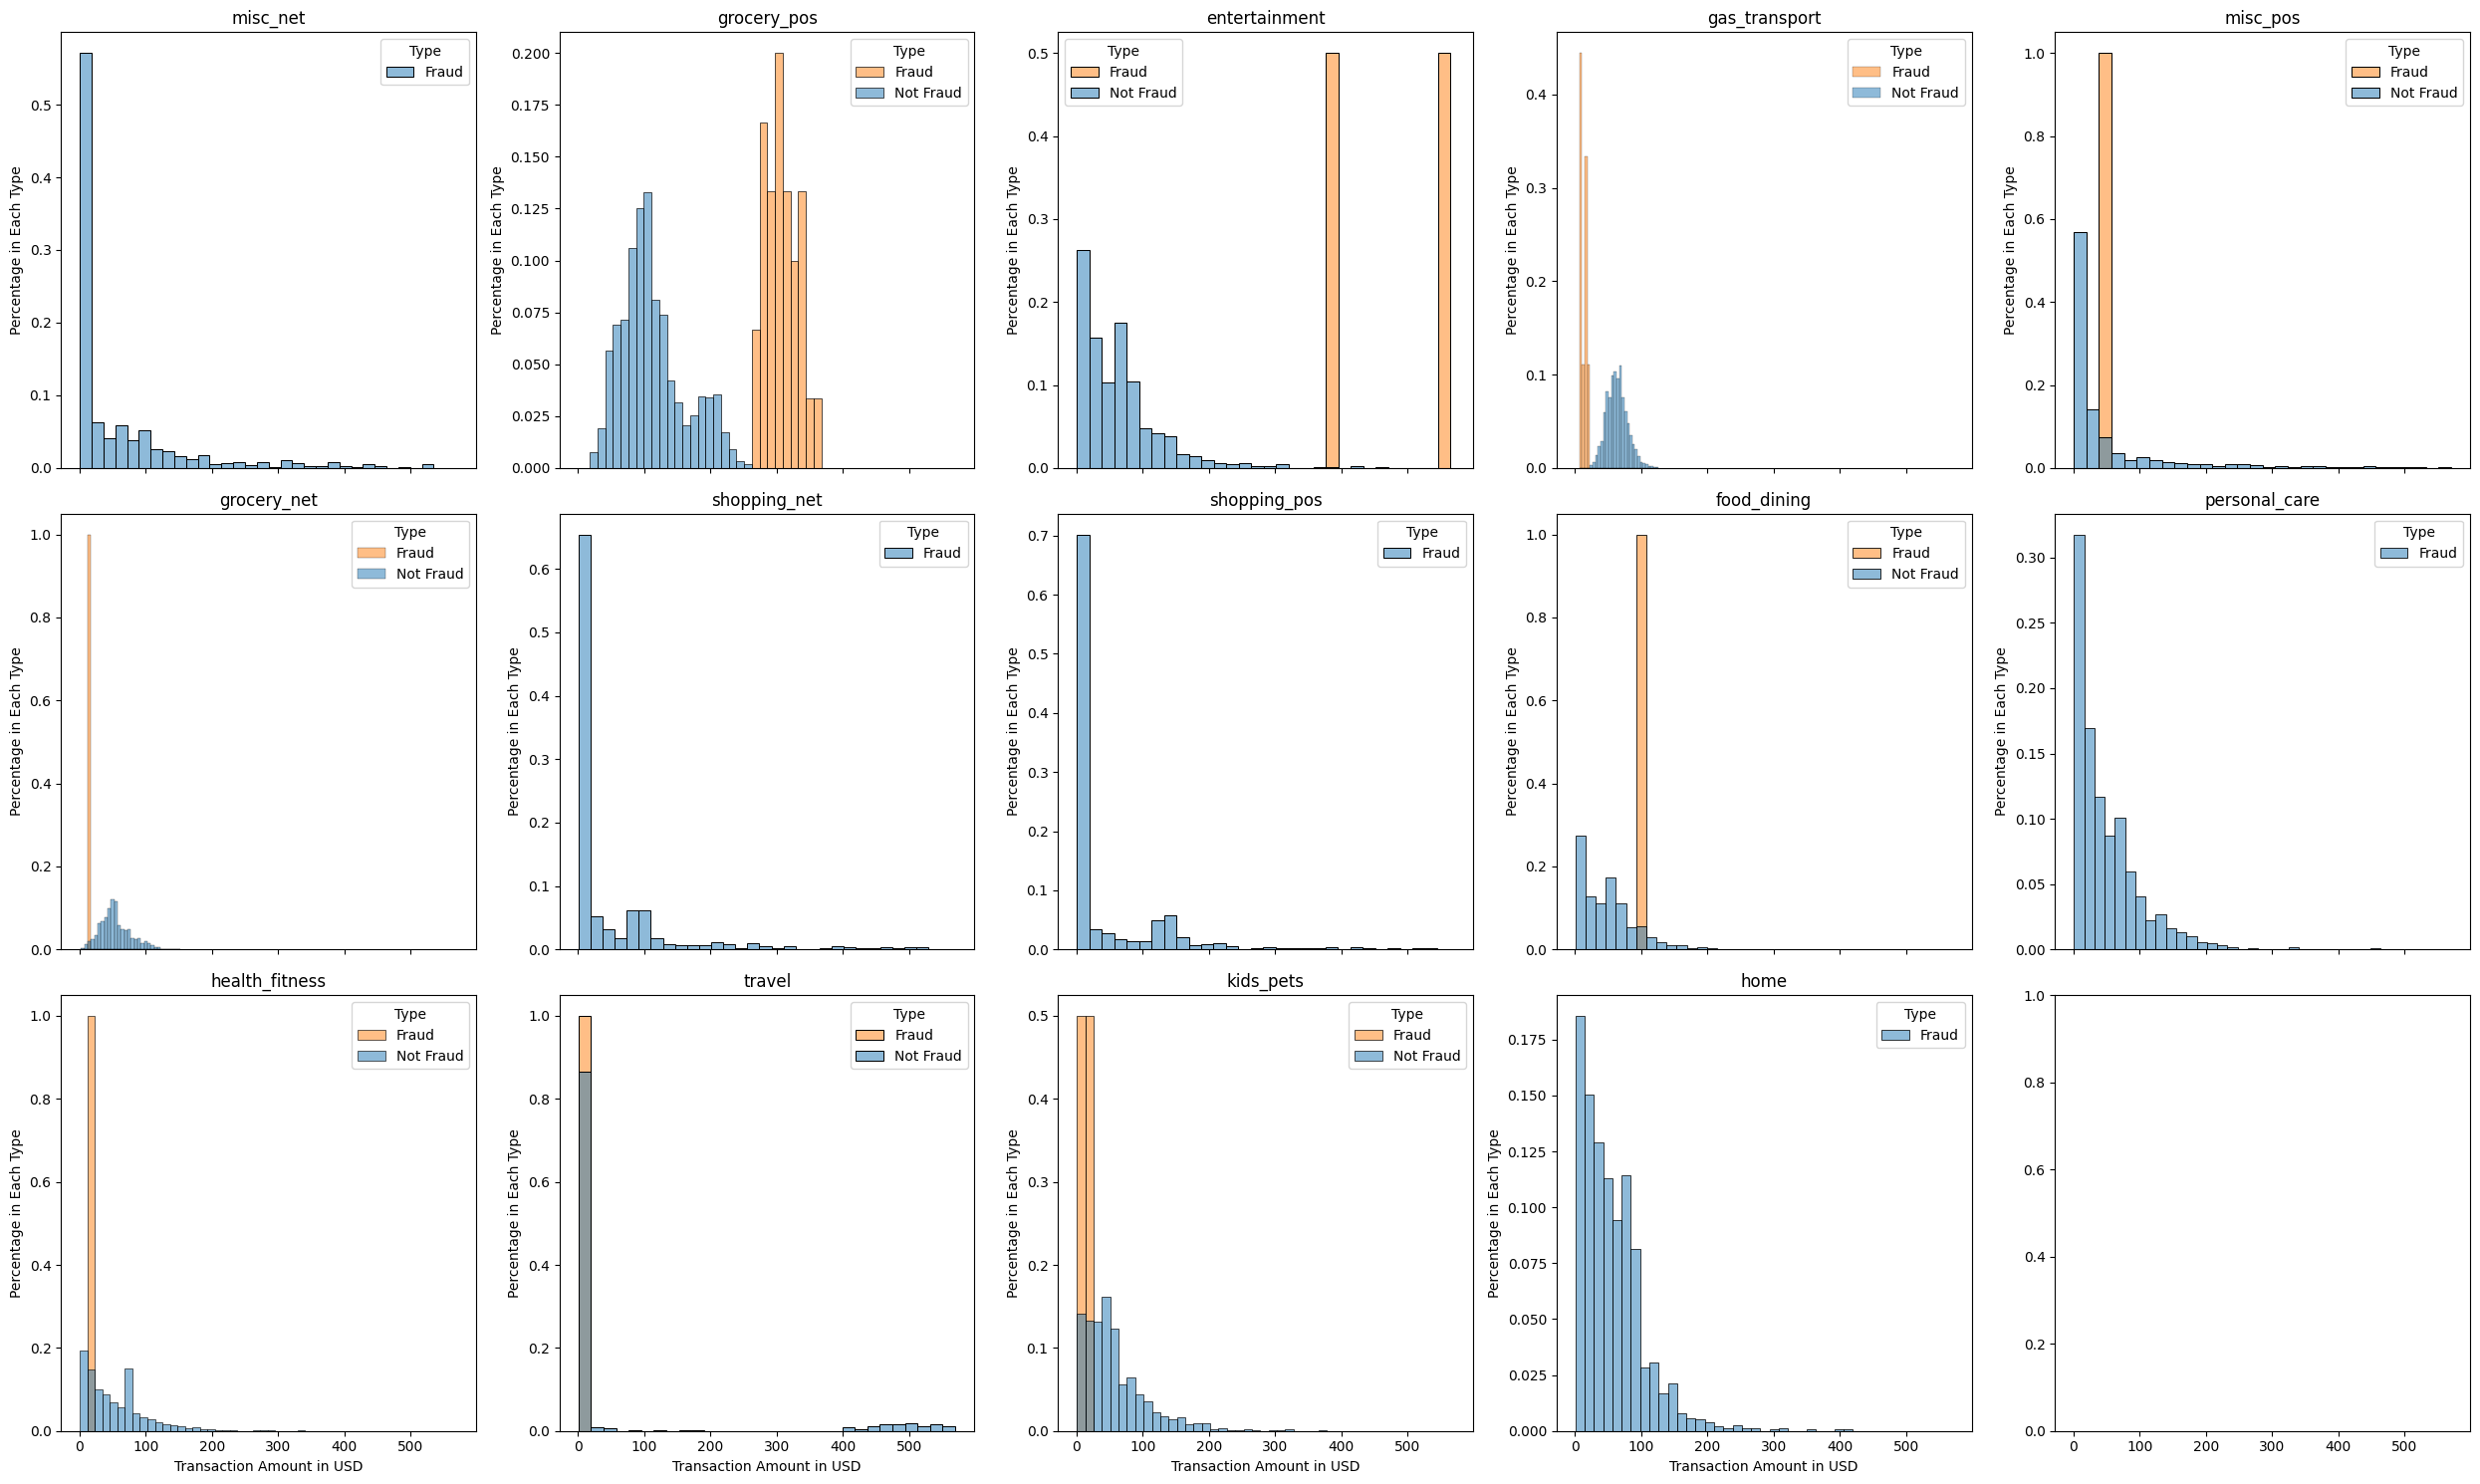

In [ ]:
import math
categories = train['category'].unique()

num_plots = len(categories)
num_rows = math.isqrt(num_plots)
num_cols = math.ceil(num_plots / num_rows)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(
    5*num_cols, 5*num_rows), sharex=True)

for ax, category in zip(axes.ravel(),categories):

    data_category = train[train['category'] == category]

    sns.histplot(x='amt', data=data_category[data_category['amt'] <= pct99],
                 hue='is_fraud', stat='probability',
                 common_norm=False, bins=30, ax=ax)

    ax.set_ylabel('Percentage in Each Type')
    ax.set_xlabel('Transaction Amount in USD')
    ax.set_title(f'{category}')
    ax.legend(title='Type', labels=['Fraud', 'Not Fraud'])

plt.tight_layout()
plt.show();

**There are patterns in categories hence we must consider categories for modelling**

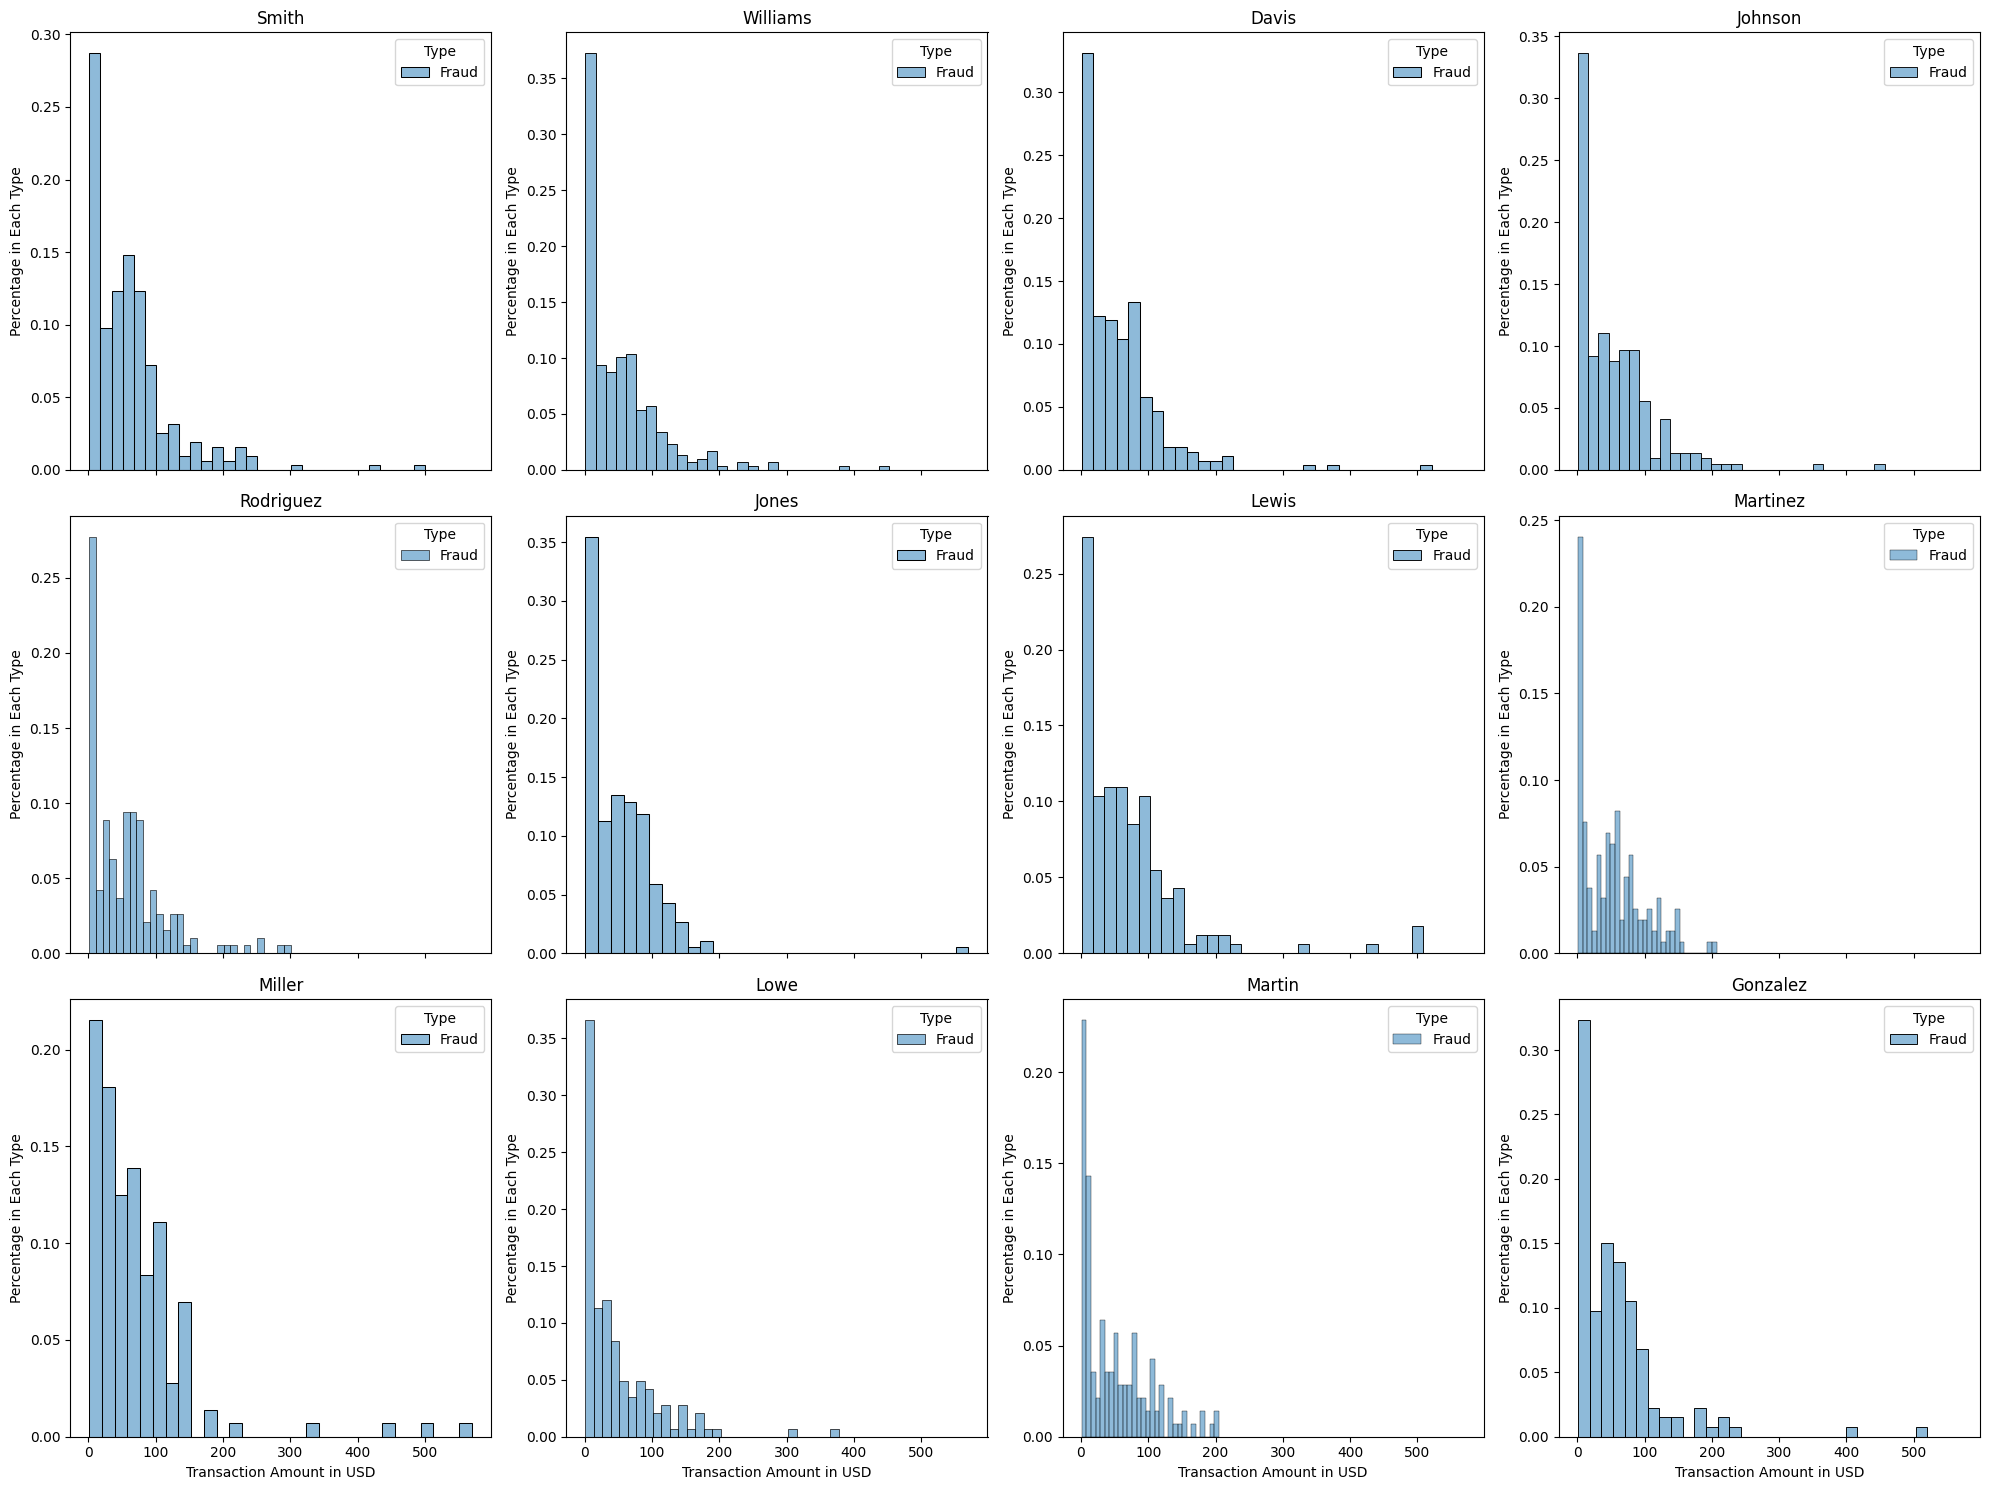

In [ ]:
import math
lastnames = train['last'].value_counts().index[:12]

num_plots = len(lastnames)
num_rows = math.isqrt(num_plots)
num_cols = math.ceil(num_plots / num_rows)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(
    5*num_cols, 5*num_rows), sharex=True)



for ax, lastname in zip(axes.ravel(),lastnames):

    data_lastname = train[train['last'] == lastname]

    sns.histplot(x='amt', data=data_lastname[data_lastname['amt'] <= pct99],
                 hue='is_fraud', stat='probability',
                 common_norm=False, bins=30, ax=ax)

    ax.set_ylabel('Percentage in Each Type')
    ax.set_xlabel('Transaction Amount in USD')
    ax.set_title(f'{lastname}')
    ax.legend(title='Type', labels=['Fraud', 'Not Fraud'])

plt.tight_layout()
plt.show();

**There are patterns in lastnames as well hence we must consider Lastnames for modelling**

In [ ]:
train["state"].value_counts().shape

(50,)

In [ ]:
train.groupby("state")["is_fraud"].value_counts()

state  is_fraud
AK     0.0          35
       1.0          15
AL     0.0         495
AR     0.0         377
       1.0           9
                  ... 
VT     0.0         137
WA     0.0         219
WI     0.0         327
WV     0.0         353
WY     0.0         235
Name: count, Length: 61, dtype: int64

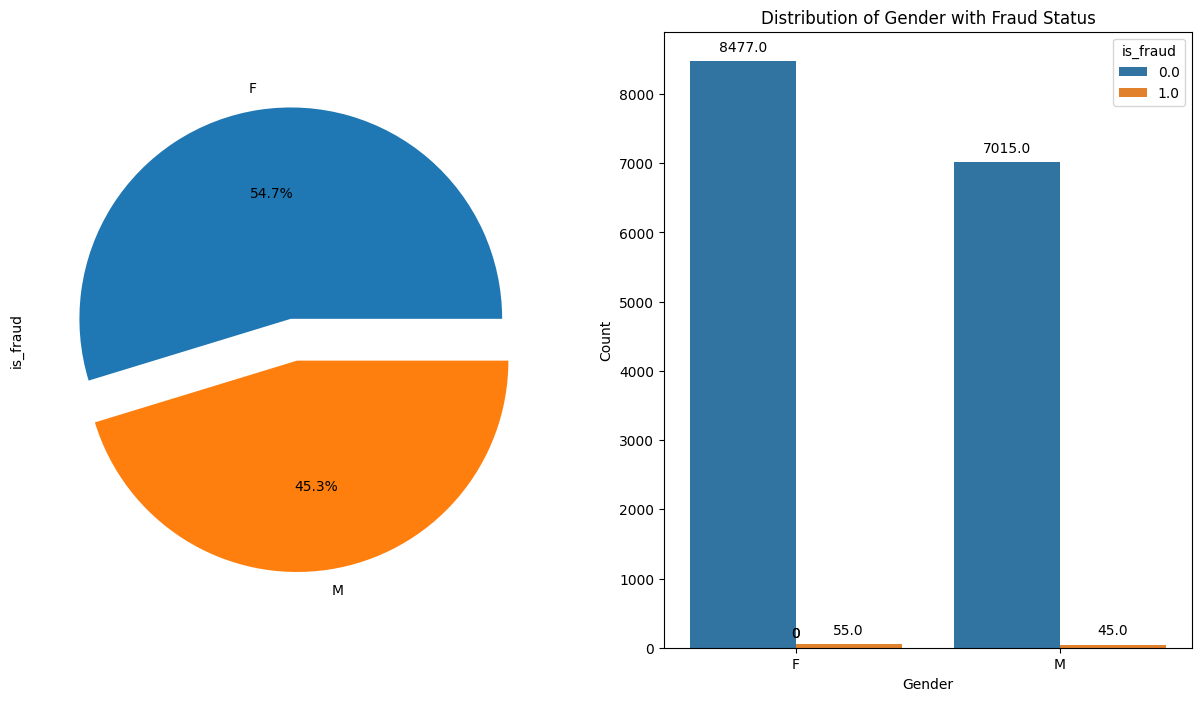

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,axb = plt.subplots(ncols=2,nrows=1,figsize=(15, 8))

#Gender Distribution
explode = [0.1, 0.1]
train.groupby('gender')['is_fraud'].count().plot.pie(explode=explode, autopct="%1.1f%%",ax=axb[0]);

ax = sns.countplot(x="gender", hue="is_fraud", data=train,ax=axb[1])

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels and title
plt.title("Distribution of Gender with Fraud Status")
plt.xlabel("Gender")
plt.ylabel("Count")

# Show the plot
plt.show()

**Females are doing more transactions but males are more likely to make fraud transaction**

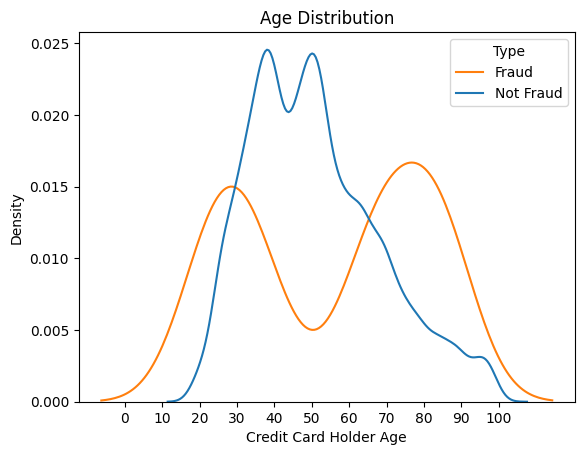

In [ ]:
import datetime as dt

train['age'] = dt.date.today().year-pd.to_datetime(train['dob']).dt.year
test['age'] = dt.date.today().year-pd.to_datetime(test['dob'], errors='coerce').dt.year


ax = sns.kdeplot(x='age', data=train, hue='is_fraud', common_norm=False)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0, 110, 10))
plt.title('Age Distribution')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud']);


**Age has a less major impact on target**

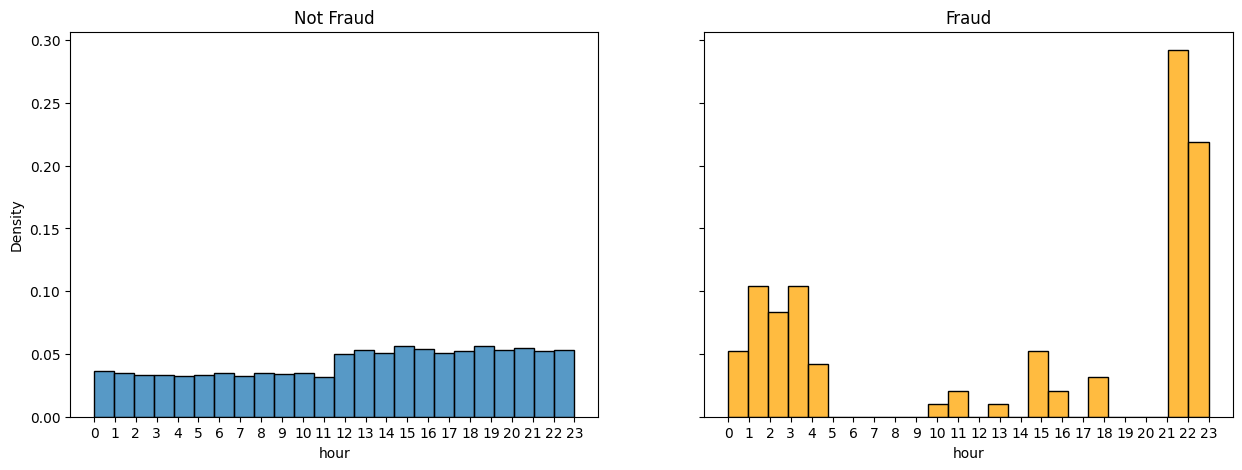

In [ ]:
train['hour'] = pd.to_datetime(train['trans_date_trans_time']).dt.hour
test['hour'] = pd.to_datetime(test['trans_date_trans_time']).dt.hour

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5), sharey=True)

ax1 = sns.histplot(x='hour', data=train[train["is_fraud"] == 0],
                   stat="density", bins=24, ax=ax1)

ax2 = sns.histplot(x='hour', data=train[train["is_fraud"] == 1],
                   stat="density", bins=24, ax=ax2, color="orange")

ax1.set_title("Not Fraud")
ax2.set_title("Fraud")

ax1.set_xticks(np.arange(24))
ax2.set_xticks(np.arange(24));

**It is clear that fraud transactions mainly occur at midnight.**

###**5. Preparing Data For Modelling**

In [ ]:
train.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
category                  object
amt                      float64
last                      object
gender                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
merch_lat                float64
merch_long               float64
is_fraud                 float64
age                        int32
hour                       int32
dtype: object

In [ ]:
train["gender"]= train["gender"].apply(lambda x: 1 if x == "M" else 0)
test["gender"]= test["gender"].apply(lambda x: 1 if x == "M" else 0)

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce

def apply_woe(train, columns, target_col):
    woe = ce.WOEEncoder()

    for col in columns:
        X = train[col]
        # Ensure target variable is binary (0 or 1)
        # Handle cases where the target column might have values other than the first two unique ones
        y = train[target_col].apply(lambda x: 1 if x == train[target_col].unique()[0] else 0)

        new_col_name = f"{col}_WOE"
        train[new_col_name] = woe.fit_transform(X, y)

    return train


columns_to_encode = ["category", "state", "city", "job","last"]
target_column = "is_fraud"

# Check unique values in target column before applying WOE
print(train[target_column].unique())

train = apply_woe(train, columns_to_encode, target_column)
# Assuming 'test' also has the same issue with the target column
print(test[target_column].unique())
test = apply_woe(test, columns_to_encode, target_column)

[ 0.  1. nan]
[ 0.  1. nan]


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
col_drop = ["is_fraud","trans_date_trans_time","trans_num","dob","category", "state", "city", "job","last"]
X_train,X_test,y_train,y_test = train.drop(columns=col_drop),test.drop(columns=col_drop),train["is_fraud"],test["is_fraud"]

In [ ]:
X_train.dtypes

Unnamed: 0        int64
cc_num            int64
amt             float64
gender            int64
zip               int64
lat             float64
long            float64
city_pop          int64
merch_lat       float64
merch_long      float64
age               int32
hour              int32
category_WOE    float64
state_WOE       float64
city_WOE        float64
job_WOE         float64
last_WOE        float64
dtype: object

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=0.1, random_state=23)
# X_undersampled, y_undersampled = rus.fit_resample(X_train, y_train)
X_undersampled, y_undersampled = X_train, y_train


**Tried Undersampling but without Undersampling model has greater score so commented it**

In [ ]:
y_train.value_counts(),y_undersampled.value_counts()

(is_fraud
 0.0    15492
 1.0      100
 Name: count, dtype: int64,
 is_fraud
 0.0    15492
 1.0      100
 Name: count, dtype: int64)

**Undersampled normal transactions from 12L to 75k**

In [ ]:
X_undersampled.sample(2)

,Unnamed: 0,cc_num,amt,gender,zip,lat,long,city_pop,merch_lat,merch_long,age,hour,category_WOE,state_WOE,city_WOE,job_WOE,last_WOE
638,638,4873783502705038,14.92,0,98233,48.4786,-122.3345,14871,49.365420,-121.909876,50,8,0.698051,0.380148,-1.646183,-1.646183,-1.646183
6545,6545,4623560839669,3.96,1,51453,42.2619,-94.5566,695,43.257884,-95.386012,70,6,0.698051,0.788639,-1.681275,-1.375893,-1.681275


<Axes: >

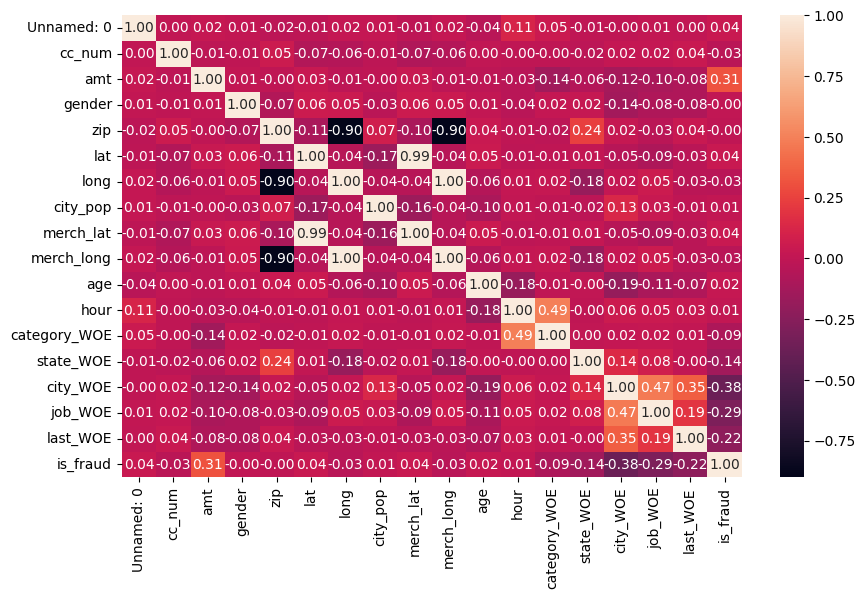

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(pd.concat([X_undersampled,y_undersampled],axis=1).corr(),annot=True,fmt='.2f')

**Amount has the highest corelation with fraud other columns have very negligible effect on fraud transaction**

In [ ]:
# col_d = ["zip","lat","long","city_pop","merch_lat", "merch_long", "cc_num"]
col_d = []

X_train = X_undersampled.drop(columns=col_d)
X_test =  X_test.drop(columns=col_d)
y_train = y_undersampled

**Tried Dropping these columns but score is greater keeping these columns**

In [ ]:
X_train.head(2)

,Unnamed: 0,cc_num,amt,gender,zip,lat,long,city_pop,merch_lat,merch_long,age,hour,category_WOE,state_WOE,city_WOE,job_WOE,last_WOE
0,0,2703186189652095,4.97,0,28654,36.0788,-81.1781,3495,36.011293,-82.048315,36,0,-1.044446,-1.361379,-1.681275,-1.142278,-1.681275
1,1,630423337322,107.23,0,99160,48.8878,-118.2105,149,49.159047,-118.186462,46,0,-1.171602,0.380148,-0.902605,-0.750799,-1.121659


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((15593, 17), (15593,), (19466, 17), (19466,))

In [ ]:
#classification report
from sklearn.metrics import classification_report,confusion_matrix,precision_score,accuracy_score


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

# Create an imputer to replace missing values with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on your training data and transform both training and test data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Impute missing values in y_train (if any) and force to be of type string
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1))
y_train = pd.Series(y_train_imputed.ravel().astype(str), dtype='category') # Force to string first, then to category

# Now you can fit your model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Impute missing values in y_test (if any)
y_test_imputed = imputer.transform(y_test.values.reshape(-1, 1))
y_test = pd.Series(y_test_imputed.ravel().astype(str), dtype='category') # Force to string first, then to category

# Now you can evaluate your model
rf.score(X_test,y_test)

0.998458851330525

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19398
         1.0       0.83      0.71      0.76        68

    accuracy                           1.00     19466
   macro avg       0.91      0.85      0.88     19466
weighted avg       1.00      1.00      1.00     19466



<Axes: >

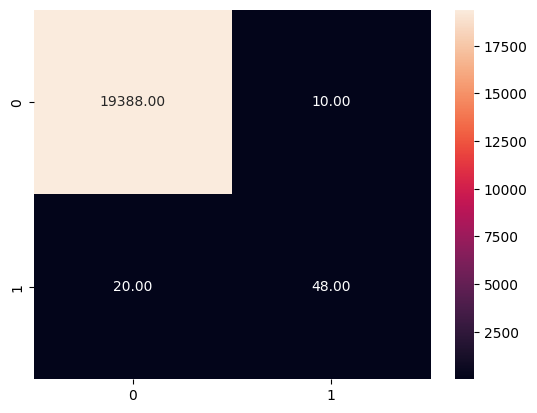

In [ ]:
y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred))
cnf = confusion_matrix(y_test,y_pred)
sns.heatmap(cnf,annot=True,fmt=".2f")

###**6. Feature Importance**

In [ ]:
print("Accuracy: ", accuracy_score(y_test,y_pred))
print("Precision: ", precision_score(y_test,y_pred))

Accuracy:  0.998458851330525
Precision:  0.8275862068965517


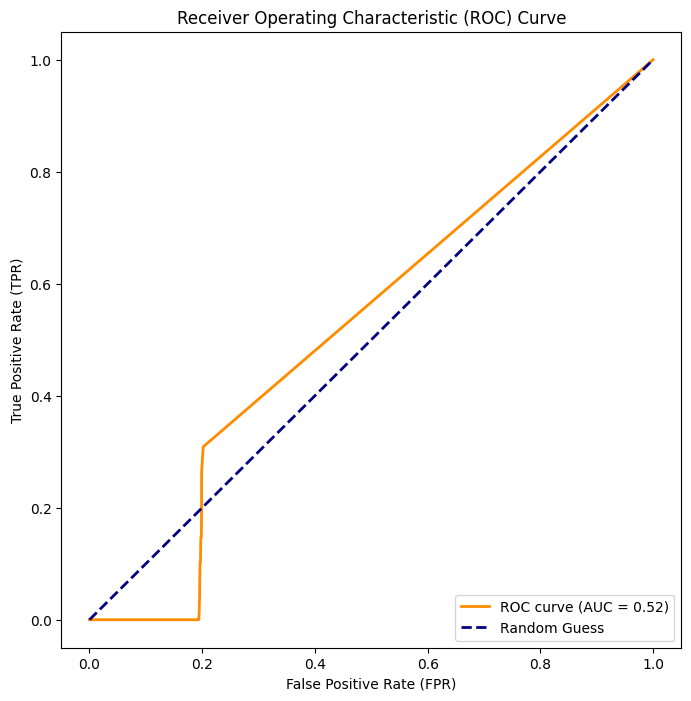

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
y_prob = rf.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC (Area Under the Curve) score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

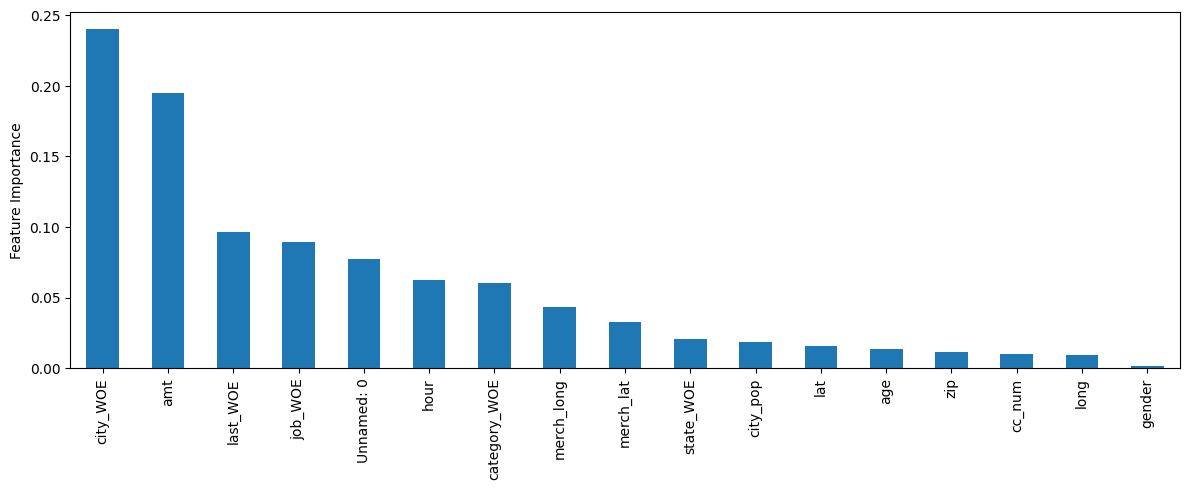

In [ ]:
importances = rf.feature_importances_
forest_importances = pd.Series(importances,index=X_undersampled.columns)
fig, ax = plt.subplots(figsize=(12, 5))
forest_importances.sort_values(ascending=False).plot.bar(ax=ax)
ax.set_ylabel("Feature Importance")
fig.tight_layout();

In [ ]:
import pickle as pkl
pkl.dump(rf,open("model.pkl","wb"))

# **Conclusion :**
In this problem, it is crucial to look at precision score besides the accuracy score because of highly imbalanced dataset.

Since our problem is related to fraud transactions, the model with low false negatives (transactions that are predicted as non-frauds and but actually are fraudulents) is better.

In this problem the precision and recall metric are the most important for the model.